# Imports

In [ ]:
!pip install fastbook
from fastbook import *


# Gethin images

In [17]:
# generatin heros list
def imgDownload(imgList = ['batman','flash','superman','shazam'], imgNum = 3,folderName = 'imgs'):
    path = Path(folderName) # path to images
    if not path.exists(): # if path doesn't exist
        path.mkdir()    # create path
        for o in imgList:   # for each hero in list
            dest = Path(path/o) # create path to image
            dest.mkdir(exist_ok=True) # create path for hero
            urls = search_images_ddg(o,max_images= imgNum) # get urls for hero
            for index,url in enumerate(urls): # for each url
                download_url(url,f"{dest}/{index}.jpg") # download image
    return path
        

In [3]:
# checking integrity of images
def imgCheck(path):
    fns = get_image_files(path) # get all image files
    failed = verify_images(fns) # check if images are valid
    failed.map(Path.unlink) # delete images that are not valid
    return len(failed)


# generating DataLoader

In [18]:
dlGenerator = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # ImageBlock is the image block
    get_items=get_image_files, # get all image files    
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # split into train and valid
    get_y=parent_label, # get parent label
    item_tfms= RandomResizedCrop(224,min_scale = 0.5), # resize images to 128x128
    batch_tfms= aug_transforms() # augment images
)

# Generating and training the model

In [25]:
path = imgDownload(imgNum = 40, folderName = "img1") # download images
imgCheck(path)  # check images

HTTPError: ignored

In [23]:
dl = dlGenerator.dataloaders(path)
learn = vision_learner(dl, models.resnet18, metrics=accuracy) # create learner
learn.fine_tune(5) # fine tune model

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,nan,3.733085,0.250000,00:03


/usr/local/lib/python3.7/dist-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,accuracy,time
0,nan,3.733085,0.250000,00:03
1,nan,3.733085,0.250000,00:03
2,nan,3.733085,0.250000,00:03
3,nan,3.733085,0.250000,00:03
4,nan,3.733085,0.250000,00:03


# Inspecting results

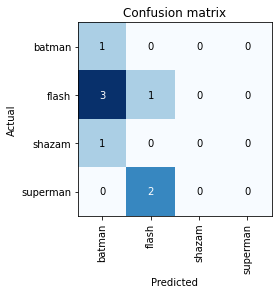

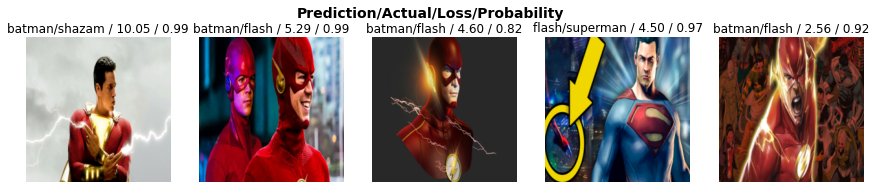

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(5, nrows=1)

# Cleaning Dataset

In [22]:
#cleaner = ImageClassifierCleaner(learn)
#cleaner

NameError: ignored

In [ ]:
# Delete images taged in the cleaner
#for idx in cleaner.delete(): cleaner.fns[idx].unlink()